**CSE455 HW3 Ertugrul Kasikci 200104004097**

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

def pca(matrix):
  # Compute the mean of the columns of matrix
  mean = np.mean(matrix, axis=0)

  # Subtract the mean from matrix (mean normalization)
  matrix_centered = matrix - mean

  # Compute the SVD of matrix
  u, s, vh = np.linalg.svd(matrix, full_matrices=False)

  # Compute the weights (eigenvalues) of the principal components
  weights = s ** 2 / (matrix.shape[0] - 1)

  # Compute the principal components (eigenvectors) of X
  vectors = vh.T

  return mean, weights, vectors

def part_2(X_train_reduced, X_test_reduced, random_elements_reduced):
  # Plot class locations
  plt.figure(figsize=(4, 3))
  plt.scatter(random_elements_reduced[:, 0], random_elements_reduced[:, 1])
  plt.title(f'PCA - {numbers} components (1st and 2nd)')
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.colorbar()
  plt.show()

  plt.figure(figsize=(4, 3))
  plt.scatter(random_elements_reduced[:, 0], random_elements_reduced[:, 2])
  plt.title(f'PCA - {numbers} components (1st and 3rd)')
  plt.xlabel('First Principal Component')
  plt.ylabel('Third Principal Component')
  plt.colorbar()
  plt.show()

  random_forest(X_train_reduced, X_test_reduced, y_train, y_test)

def random_forest(X_train, X_test, y_train, y_test):
  rfc = RandomForestClassifier(n_estimators=100)
  rfc.fit(X_train, y_train)
  y_predict = rfc.predict(X_test)

  # Evaluate the accuracy of the classifier
  accuracy = rfc.score(X_test, y_test)

  print("Random Forest Tree Accuracy: ", accuracy)

  # Perform k-fold cross-validation
  cv_scores = cross_val_score(rfc, X_train, y_train, cv=6)
  print("\nCross-validation scores:", cv_scores)
  print("Mean cross-validation score: {:0.4}".format(np.mean(cv_scores)))
  print("\n\n")



(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train[0:1000]
X_test = X_test[0:250]
y_train = y_train[0:1000]
y_test = y_test[0:250]


# Get the number of rows in the array
num_rows = X_test.shape[0]

# Choose 1000 random indices without replacement
random_indices = np.random.choice(num_rows, size=100, replace=False)

# Select the corresponding rows from the original array
random_elements = X_train[random_indices]

random_numbers = [5, 10, 50, 100, 500]


In part 1 I implemented PCA by using pca() function. It returns mean, weights(The principal components), vectors(eigenvalues). These values will be used when implementing part 2.

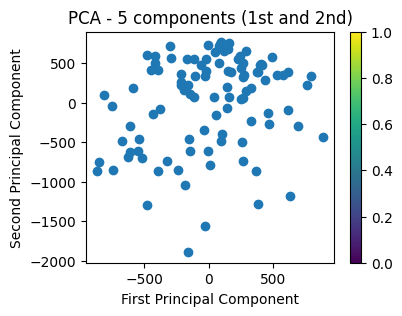

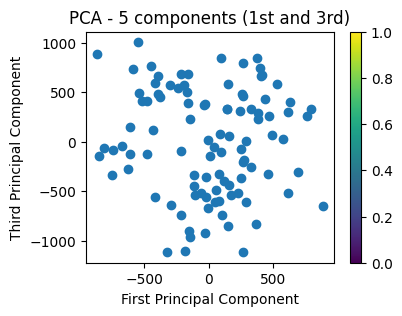

Random Forest Tree Accuracy:  0.644

Cross-validation scores: [0.68862275 0.74850299 0.76646707 0.68862275 0.71084337 0.74096386]
Mean cross-validation score: 0.724





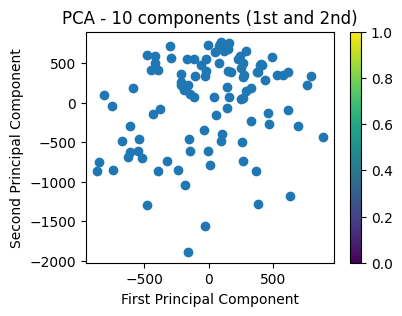

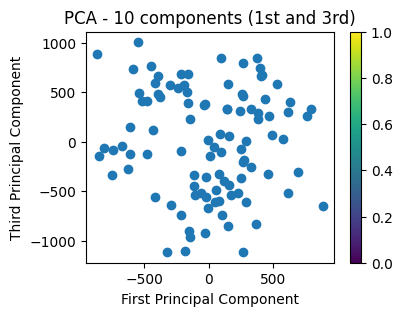

Random Forest Tree Accuracy:  0.788

Cross-validation scores: [0.82634731 0.82634731 0.84431138 0.81437126 0.86144578 0.8313253 ]
Mean cross-validation score: 0.834





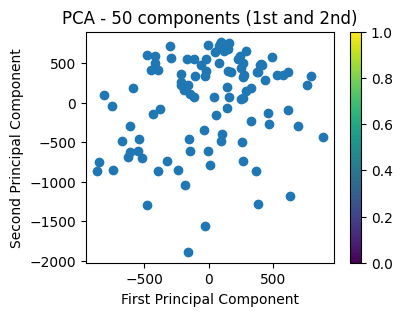

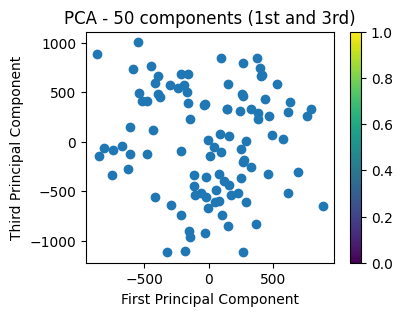

Random Forest Tree Accuracy:  0.852

Cross-validation scores: [0.86826347 0.84431138 0.8742515  0.82035928 0.87951807 0.87349398]
Mean cross-validation score: 0.86





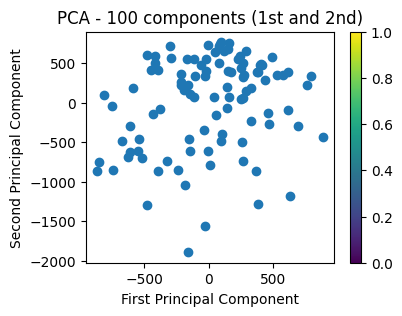

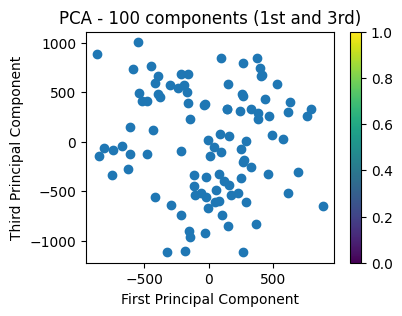

Random Forest Tree Accuracy:  0.832

Cross-validation scores: [0.84431138 0.86826347 0.86826347 0.83832335 0.8373494  0.87951807]
Mean cross-validation score: 0.856





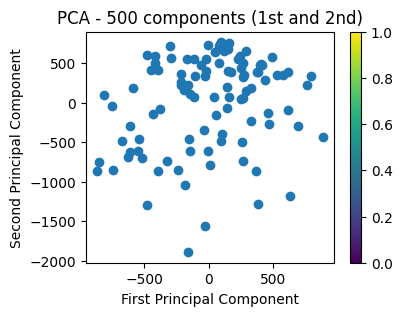

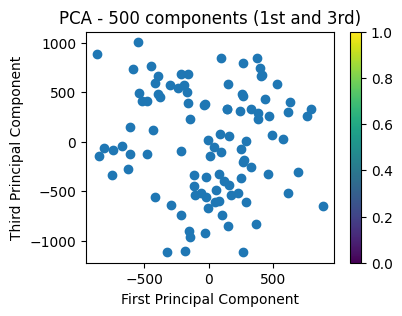

Random Forest Tree Accuracy:  0.732

Cross-validation scores: [0.76047904 0.77245509 0.77245509 0.67065868 0.73493976 0.78313253]
Mean cross-validation score: 0.749





In [2]:
# Uses the pca() function that I created
for numbers in random_numbers:
  mean, weights, vectors = pca(X_train)
  X_train_reduced = np.dot(X_train - mean, vectors[:, :numbers])
  X_test_reduced = np.dot(X_test - mean, vectors[:, :numbers])
  mean, weights, vectors = pca(random_elements)
  random_elements_reduced = np.dot(random_elements - mean, vectors[:, :numbers])
  part_2(X_train_reduced, X_test_reduced, random_elements_reduced)


By using mean, weights(The principal components), vectors(eigenvalues) values pca is implemented. As mentioned in the homework document, I used 1000 random samples from MNIST data to plot the class locations for the first and second principal components and then for the first and third principal components for different numbers of components. After that, I used X_train for random forest decision tree and showed the classification results using cross-validation for different numbers of components.

I realized that the accuracy increased to some point. But after that, it started to decrease. We will see that it also happened at non-linear PCA implementation in python

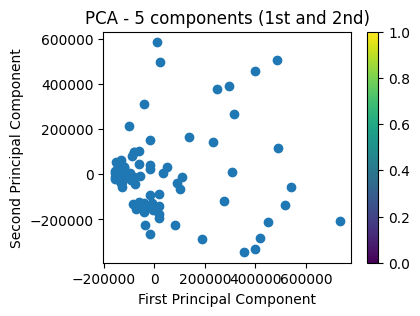

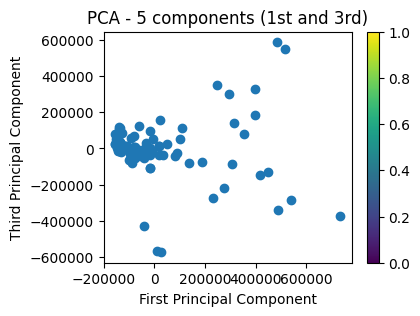

Random Forest Tree Accuracy:  0.612

Cross-validation scores: [0.66467066 0.68862275 0.74850299 0.63473054 0.6746988  0.69277108]
Mean cross-validation score: 0.684





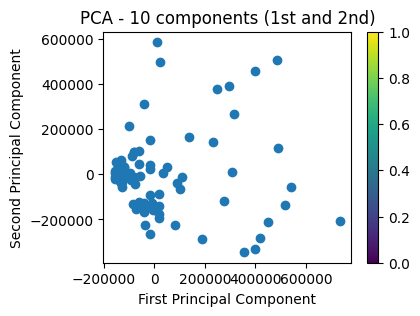

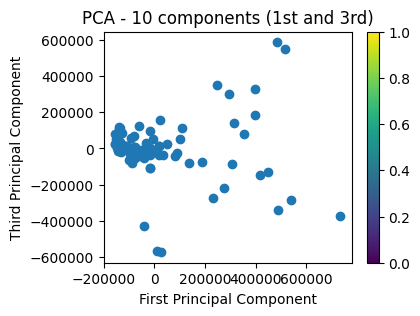

Random Forest Tree Accuracy:  0.74

Cross-validation scores: [0.79640719 0.82035928 0.84431138 0.76646707 0.80120482 0.80120482]
Mean cross-validation score: 0.805





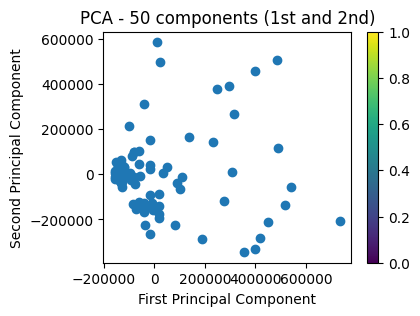

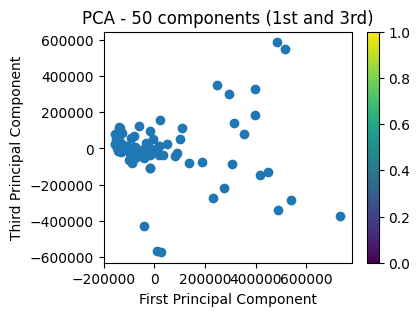

Random Forest Tree Accuracy:  0.84

Cross-validation scores: [0.85628743 0.85628743 0.91017964 0.84431138 0.86144578 0.86144578]
Mean cross-validation score: 0.865





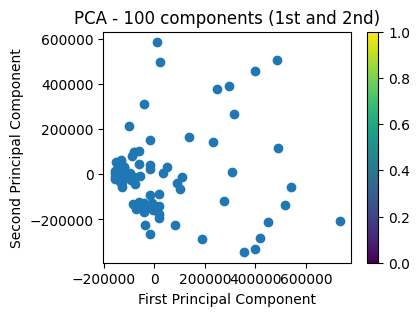

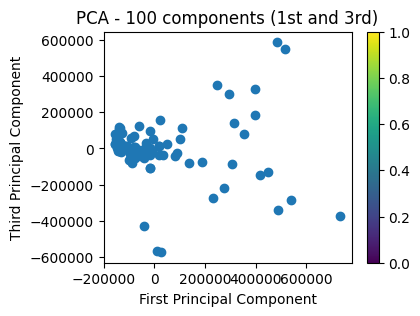

Random Forest Tree Accuracy:  0.836

Cross-validation scores: [0.86826347 0.8502994  0.88622754 0.82634731 0.84939759 0.85542169]
Mean cross-validation score: 0.856





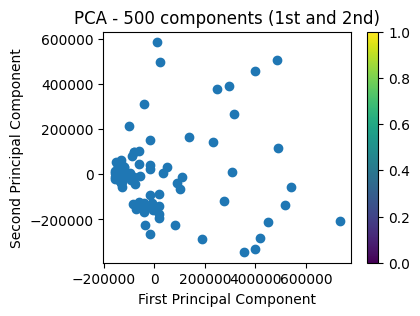

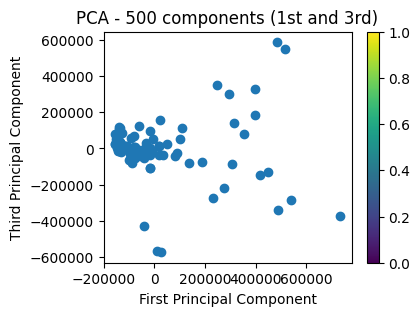

Random Forest Tree Accuracy:  0.832

Cross-validation scores: [0.82634731 0.79640719 0.83233533 0.83233533 0.78313253 0.73493976]
Mean cross-validation score: 0.8009





In [3]:
# Uses the existing implementation of a non-linear PCA
for numbers in random_numbers:
  kpca = KernelPCA(n_components=numbers, kernel='poly')
  X_train_reduced = kpca.fit_transform(X_train)
  X_test_reduced = kpca.transform(X_test)
  random_elements_reduced = kpca.fit_transform(random_elements)
  part_2(X_train_reduced, X_test_reduced, random_elements_reduced)

This step uses non-linear PCA implementation of Python (which is KernelPCA) and the rest of the things are the same as in the previous part. The results are also similar and the behaviors which I mentioned before (accuracy increasing to some part than decreasing) holds here too. Which is quite interesting because I normally expect that accuracy increases as we use more columns because it means more information. To be sure, I fed random_forest() (which is the function I wrote for the implementation of random forest tree classification and cross-validation results) with the original MNIST dataset. And the accuracy is higher than ever. So the decreasing part can be just a coincidence.

In [4]:
random_forest(X_train, X_test, y_train, y_test)

Random Forest Tree Accuracy:  0.888

Cross-validation scores: [0.88023952 0.86826347 0.89820359 0.86227545 0.87951807 0.89156627]
Mean cross-validation score: 0.88





**NOTE:** I needed to shrink the size of MNIST data because Google Colab gives me an error about inefficient memory. I thought that it is no problem because the result is almost the same and there is no difference in the implementation.